# Mentoria DiploDatos - ChurnNoMore

##### Cual es el objetivo de este proyecto? 
Identificar factores claves que inciden en la decision de los clientes de continuar o desistir del servicio brindado por la compañia. Por otro lado, demostraremos patrones que contribuyan a la fidelización de los clientes.

##### Que problema estamos intentando resolver? 
Analizar las variables y diseñar un modelo de machine learning que anticipe futuros casos de desuscripcion de clientes para tomar medidas antes de la desercion de los mismos. 

##### Cual es la industria analizada?
El dataset contiene informacion acerca de una empresa prestadora de servicios del rubro de telefonia celular. El siguiente analisis podria ser aplicado tambien a industrias similares talos como prestaciones de servicios de internet, televisacion, incluso servicios de streaming o plataformas online. 


## Temario 1: Analisis y visualizacion de datos. 

In [42]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tabulate import tabulate
warnings.filterwarnings("ignore")

In [43]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 55)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [44]:
# Load daataset
df = pd.read_csv("trainingModel.csv")

In [45]:
# Preview the dataset head
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Gender,Churn
0,KS,128.00,415.00,No,Yes,25.00,265.10,110.00,45.07,197.40,99.00,16.78,244.70,91.00,11.01,10.00,3.00,2.70,1.00,M,False
1,OH,107.00,415.00,No,Yes,26.00,161.60,123.00,27.47,195.50,103.00,16.62,254.40,103.00,11.45,13.70,3.00,3.70,1.00,NaN,False
2,NJ,137.00,415.00,No,No,0.00,243.40,114.00,41.38,121.20,110.00,10.30,162.60,104.00,7.32,12.20,5.00,3.29,0.00,NaN,False
3,OH,84.00,408.00,Yes,No,0.00,299.40,71.00,50.90,61.90,88.00,5.26,196.90,89.00,8.86,6.60,7.00,1.78,2.00,F,False
4,OK,75.00,415.00,Yes,No,0.00,166.70,113.00,28.34,148.30,122.00,12.61,186.90,121.00,8.41,10.10,3.00,2.73,3.00,NaN,False
5,AL,118.00,510.00,Yes,No,0.00,223.40,98.00,NaN,220.60,101.00,18.75,203.90,118.00,9.18,6.30,6.00,1.70,0.00,NaN,False
6,MA,121.00,510.00,No,Yes,24.00,218.20,88.00,37.09,348.50,108.00,29.62,212.60,118.00,9.57,7.50,7.00,2.03,3.00,F,False
7,MO,147.00,415.00,Yes,No,0.00,157.00,79.00,26.69,103.10,94.00,8.76,211.80,96.00,9.53,7.10,6.00,1.92,0.00,M,False
8,WV,141.00,415.00,Yes,Yes,37.00,258.60,84.00,43.96,222.00,111.00,18.87,326.40,97.00,14.69,11.20,5.00,3.02,0.00,F,False
9,RI,74.00,415.00,No,No,0.00,187.70,127.00,31.91,163.40,148.00,13.89,196.00,94.00,8.82,9.10,5.00,2.46,0.00,NaN,False


In [46]:
# Get the number of rows and columns
df.shape

(104192, 21)

# Data Pre-Processing

#### Cuestiones a resolver Practico numero 2:
1. **Valores faltantes (Nan, NA o None)**: ¿Existen valores faltantes en el conjunto de datos? ¿Cómo trataria estos valores faltantes? Seleccione la mejor tecnica para perder la menor cantidad de valores, eliminando filas/columnas o imputando valores

2. **Outliers**: ¿Existen valores atipicos? ¿Que tecnica utilizarán para la deteccion y manejo de estos valores?

3. **Tratamiento de features**: Divida las variables en numericas y categoricas. Utilice algun metodo para convertir variables categoricas en numericas (one-hot encoder, label encoding, etc.)

4. **Escalado y Normalización**: ¿Necesitamos escalar o normalizar las variables numéricas? ¿Qué técnicas de escalado o normalización deberíamos usar (Min-Max Scaling, Standard Scaling, etc.)?

5. **Feature engineering**: ¿Crearia variables nuevas a partir de las que ya tenemos? ¿Existe fuerte relacion entre las variables? Aplique alguna tecnica para resolver el problema de la multicolinealidad



# Recursos utiles

### Análisis de Outliers en el Dataset
Boxplot
El boxplot nos ayuda a identificar visualmente los outliers en las variables numéricas. Pueden utilizar dos métodos diferentes: Z-score y IQR (Interquartile Range).

##### Z-score
El método Z-score detecta outliers al identificar valores que están más allá de 3 desviaciones estándar de la media.


##### IQR (Interquartile Range)
El método IQR detecta outliers al identificar valores que están más allá de 1.5 veces el rango intercuartil (IQR) de los cuartiles 1 y 3. 


Este método es útil para detectar outliers en datos que siguen una distribución normal.
Detecta un menor número de outliers en comparación con el método IQR, lo que puede ser adecuado si se desea ser menos agresivo en la eliminación de outliers.
Método IQR:

Este método es más robusto y puede detectar más outliers, especialmente si los datos tienen una distribución no normal o contienen varios outliers extremos.
Puede ser más adecuado para datasets con distribuciones sesgadas o con varios outliers.

### Encoding de variables categoricas:

Diferencia entre Escalar y Normalizar
En el contexto del machine learning, escalar y normalizar son técnicas de preprocesamiento que se utilizan para ajustar las características de los datos, pero tienen objetivos y métodos diferentes:

Escalar (Scaling)
Propósito: Cambiar el rango de los valores.
Método Común:
Min-Max Scaling: Transforma los datos a un rango específico (por ejemplo, 0 a 1).
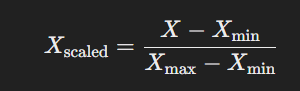
 
Aplicación: Útil cuando se desea que todas las características tengan una escala similar para evitar que características con rangos mayores dominen el modelo. Es importante para algoritmos como K-Nearest Neighbors (KNN) y Support Vector Machines (SVM).
Normalizar (Normalization)
Propósito: Ajustar la distribución de los valores para que sigan una distribución normal.
Método Común:
Standard Scaling (Z-score Normalization): Transforma los datos para que tengan una media de 0 y una desviación estándar de 1.

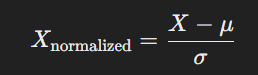
Aplicación: Útil para algoritmos que asumen que los datos están distribuidos normalmente, como Linear Discriminant Analysis (LDA) y Gaussian Naive Bayes.
¿Cuándo usar cada técnica?
Escalar (Scaling):

Cuándo usarlo: Cuando necesitas que los datos estén en un rango específico para compararlos directamente o cuando usas modelos que son sensibles a las distancias entre datos (como KNN y SVM)
Ventajas: Mejora la convergencia de los algoritmos de optimización (como el descenso del gradiente).
Normalizar (Normalization):

Cuándo usarlo: Cuando tu modelo asume una distribución normal de los datos, o cuando los datos tienen diferentes unidades y deseas que todos tengan la misma importancia.
Ventajas: Mantiene las relaciones de dispersión y es menos sensible a los outliers que el escalado por Min-Max​ (Towards AI)​​ (Let's Data Science)​.
En resumen, no es necesario aplicar ambas técnicas simultáneamente. Deberías elegir la técnica en función de las características de tus datos y del tipo de algoritmo que vayas a utilizar. Por ejemplo:

Usa Min-Max Scaling si necesitas llevar todas las características a un rango similar.
Usa Standard Scaling si tu modelo se beneficia de tener características con media 0 y desviación estándar 1.

Links de utilidad: 
https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
https://letsdatascience.com/scaling-and-normalization/